# Main notebook for the Traffic Management Challenge

This is the main notebook containing the highlights, analysis and code for the Traffic Management problem statement.

This notebook is broken down into the sections:
1. Answering and addressing the main problem statements
2. Our process of dealing with the problem

Done by:
- Chuan Hao
  - Github: [@chuanhao01](https://github.com/chuanhao01)
- David
  - Gihub: [@david-the-programmer](https://github.com/david-the-programmer)
- Sherisse
  - Github: [@sherissetjw](https://github.com/sherissetjw)


In [ ]:
!pip install geolib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geolib import geohash

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Colab Notebooks/GMSP/tm_eda.csv', sep = ',')

# Answering and addressing the main problem statements

## Problem Statement 1: Which areas have high / low traffic demand?

The rough breakdown of the total region provided in the dataset when looked at in real-world terms is as follows:
* Latitude range: 27.75 km
* Longitudinal range: 44.4 km
* Total Area: 1232.1 km square

* Area of Singapore: 725.7km square

Originally, we assumed that the dataset provided would be from Singapore. However, after looking at the range of latitude and longitude values for the total area provided in the dataset, we can see that the total area provided is larger than that of the total area of Singapore.

As such, we can probably assume that the area provided either encompasses more than a single country or multiple countries in Southeast Asia. Regardless, as we were informed that the geohash data provided would be offset, it would be more beneficial to focus on the data itself and not try to place on the World Map.

Furthermore, as the total area is quite large, we decided it would be best to first look at the demand per region broadly. As such, in order to answer this problem statement, we identified two regions each of relatively high and low demand.

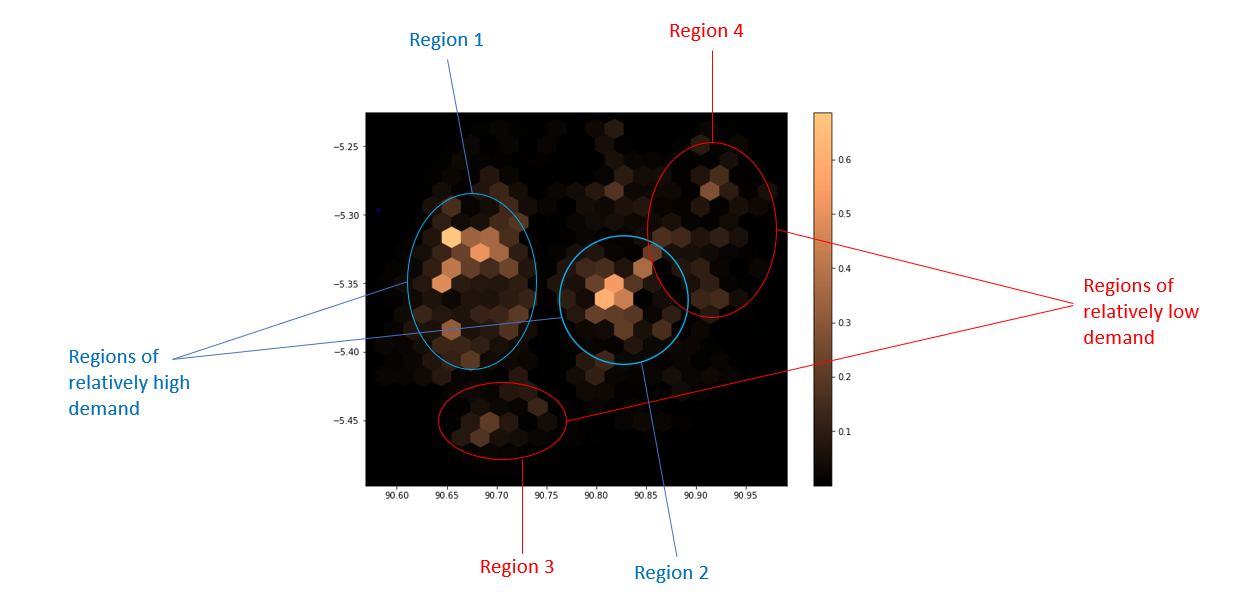

If we follow the color bar legend at the side, we can see that the brightly colored grids are regions with relatively high demand whereas the dimmer grids are regions with relatively lower demand.

The entirely black grids refer to areas which either have no data points or have little to no demand at all. If the area does not have a data point, it is because the geohash of this area was not provided in the original dataset. 

On the other hand, if the area has little to no demand at all but the geohash was provided in the dataset, it is likely that this geohash zone was missing a large majority of its data and thus, it appears to have almost no demand at all in this HexPlot as we filled in the missing rows with the appropriate data for all other columns but with 0 demand.

Regardless of the reasoning, for the purposes of this analysis, it is better for us to focus on the obvious regions that have either high or low demand and not to focus on the areas with little to no demand as the analysis may not be as accurate for low demand regions then.

Regions with obviously larger demand ( Estimated lat and lon range ):

    Region1 -> ( -5.30 to -5.40 ), ( 90.60 to 90.75 )
        * 11.1km by 16.65km
        * 184.815 km square
    Region2 -> ( -5.33 to -5.40 ), ( 90.75 to 90.85 )
        * 7.77km by 11.1km
        * 86.247 km square


Region of relatively lower demand ( Estimated lat and lon range ):

    Small region below region 1 -> ( -5.40 to -5.50 ), ( 90.65 to 90.75 )
        * 11.1km by 11.1km
        * 123.21 km square
    Region to the right of region 2 -> ( -5.30 to -5.40 ), ( 90.87 to 90.95 )
        * 11.1km by 8.88km
        * 98.568 km square

*1 degree (lat and lon) == 111km*

We can also take a closer look at each region which allows us to see the differences in the general spread of demand within the region.

**REGION 1**

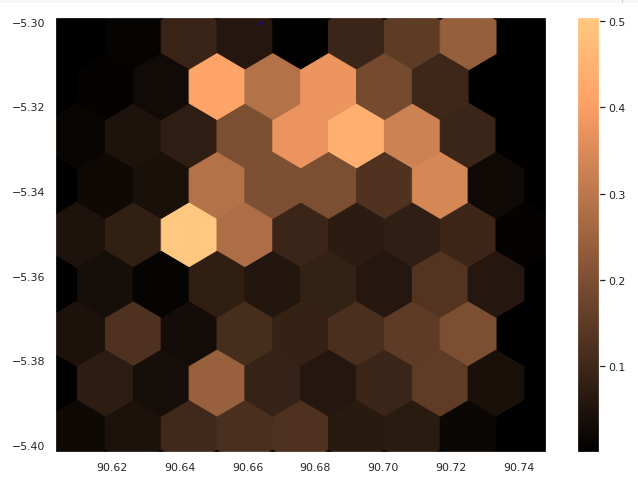

**REGION 2**

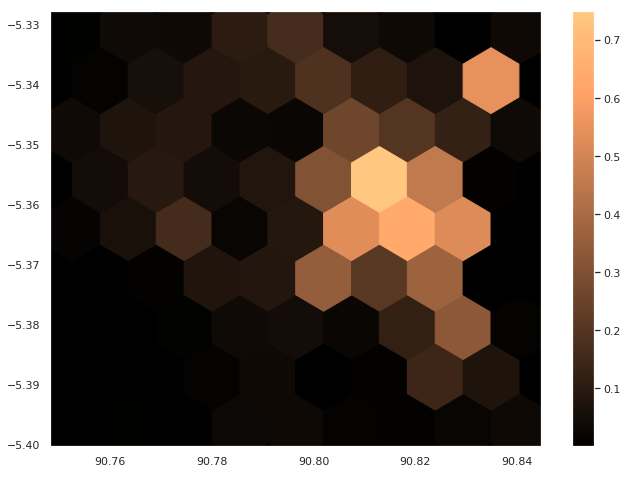

**REGION 3**

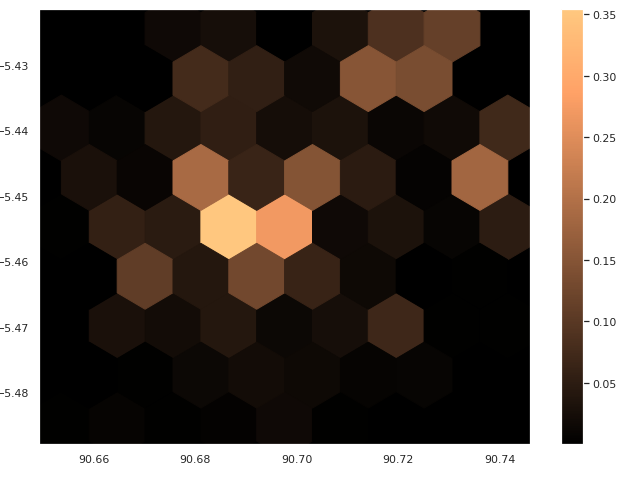

**REGION 4**

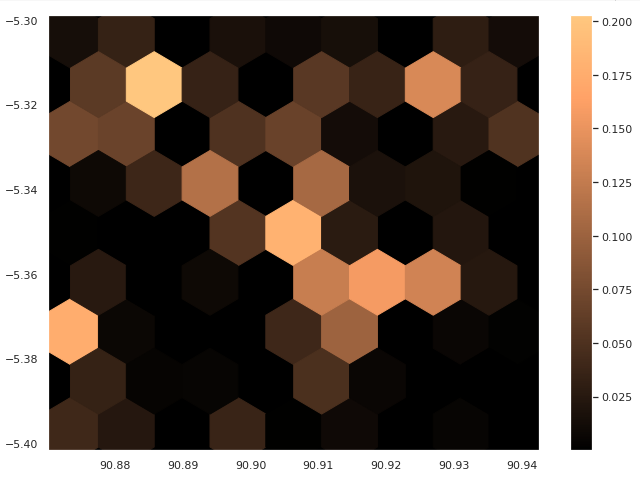

Generally, each region we identified has a smaller sub-area in which the demand is the greatest and the grids leading up to those sub-areas have a smaller demand as the distance to the sub-area increases.

Currently, we have two hypothesis. 
1. Regions of relatively high demand are Central Business District (CBD) areas whereas regions of relatively low demand are Residential areas. 
2. The sub-area within each region, whether of high or low demand, are CBD areas.

## Problem Statement 2: How does regional traffic demand change according to day / time?

In order to answer this question, we made use of the regions of high and low demand that we identified earlier. 

We also identified certain main trends that we wished to compare based on what we imagined to be true going off our experience with changes in traffic in Singapore. 




Namely, we examined:
* General trends in a day 
    * We theorised that the trend would follow an upside-down 'W' shape
    * Times when the demand is at its peak is during the morning and evening peak hours
* Differences in demand between weekdays and weekends
    * We theorised that the demand would be larger on weekends as compared to weekdays owing to the fact that more people would be free to travel around the city
* Differences in demand over the weeks
    * Considering that we were provided roughly 2 months and one week's worth of data, we felt that it might be possible that some of the data would coincide with the school holiday periods which would likely have higher demands

### Overall

First, we can take a look at the trend throughout all 61 days.

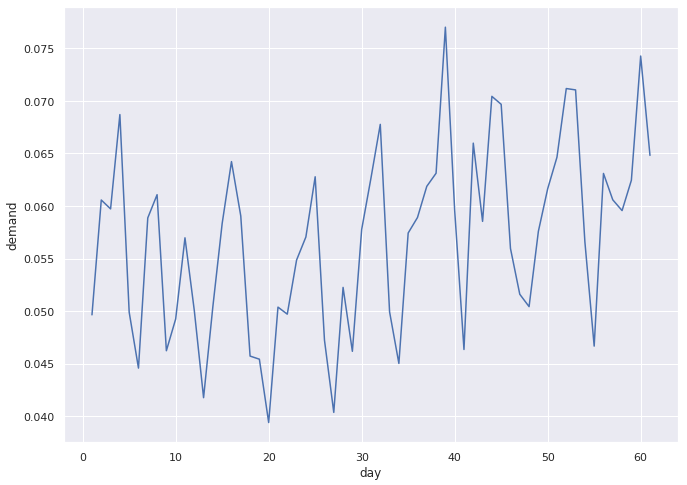

We can see a rough 'V' shape pattern in the trend over all 61 days.

The traffic demand seems to generally decrease until around the 25th day where it starts to increase in traffic demand.

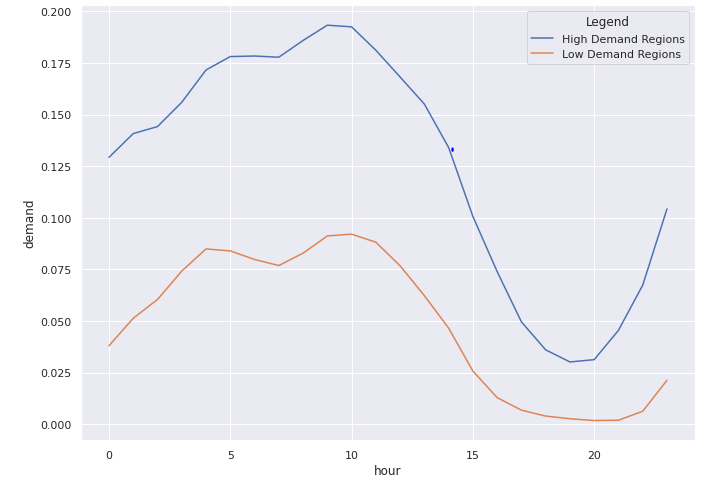

To generate the graph above, we took the mean of the demand every hour for the high and low demand regions respectively. As such at any point represents the mean of all the geohashes in that region at the hour across all days.

Generally, both high and low demand regions follow the same trend, with increasing demand starting from the early mornings until around the end of the peak hour period. Afterwhich, it starts to decrease in traffic demand, with a sharper decrease for high demand regions as compared to low demand regions, before increasing again at around 1900 to 2000 hours and into the next day.

This does more or less support our theory that high demand regions are CBD areas, whereby there is a significantly smaller traffic demand in the afternoons when everyone is at work especially when we take into account the sharper decline in traffic demand as compared to low demand regions.

On the other hand, these regions identified as relatively low demand regions are likely to be residential areas whereby it follows the same pattern throughout the day but with a smoother curve which is likely due to the fact that closer to home, one usually walks, takes their personal vehicles or stays at home which also accounts for the generally lower demand.

However, neither of these theories could explain why the traffic demand always increases after around 2000 hours. The most likely explanation we could come up with is that the traffic demand increases after 2000 hours as there are some inidividuals who work the night shifts.

As such, because these individuals are a minority, we can see the traffic demand increasing after 2000 hours but it never reaches the peak traffic demand as in the morning.

Another possible reason that could account for this increase in traffic demand after 2000 hours is that these regions contain entertainment facilities which could explain why the traffic demand goes back up as most people leave to go back home. However, this does not explain why the traffic demand also follows this same trend during the weekdays when most people would still have to go to work or school in the mornings.

### High Demand Regions


In [ ]:
animate = FuncAnimation(fig, update, repeat = True, 
                        interval = 600, frames = len(allDays))

HTML(animate.to_html5_video())

In [ ]:
animate = FuncAnimation(fig, update, repeat = True, 
                        interval = 600, frames = len(allDays))

HTML(animate.to_html5_video())

In general, the spread of traffic demand seems to increase during the weekends for high demand regions.

This does further support the theory that high demand regions are CBD areas as CBD areas usually have a number of middle to high-end restaurants which may be what contributes to the larger spread of traffic demand during the weekends as families head there to eat.

**REGION 1: Breakdown of Demand over all 61 days**

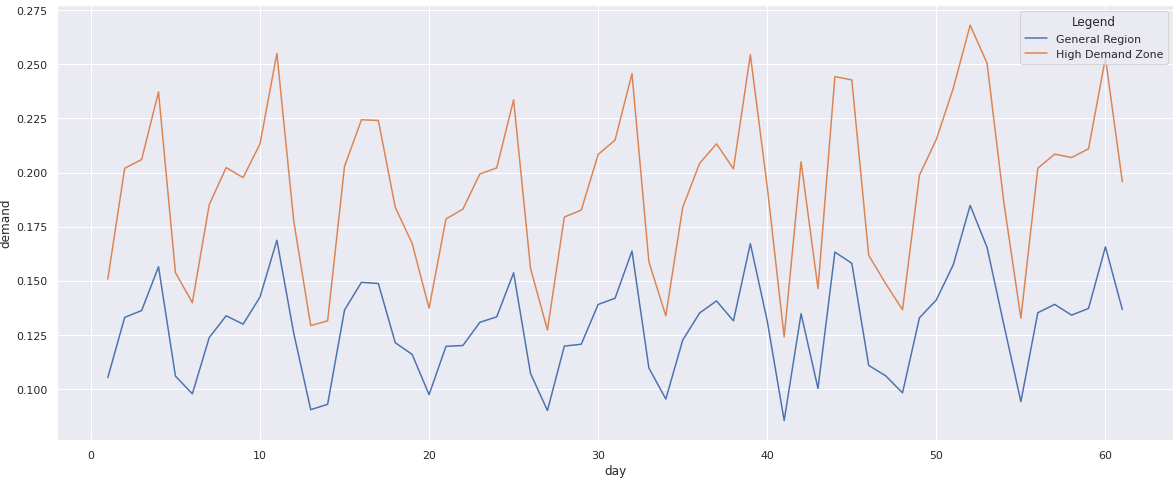

**REGION 2: Breakdown of Demand over all 61 days**

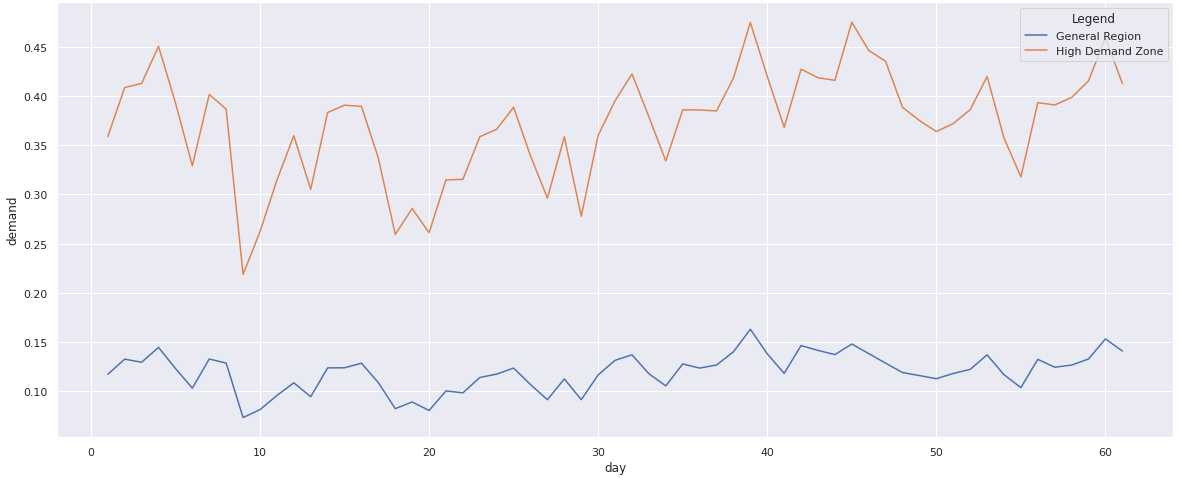

Interestingly, while the trend of the demand over all 61 days seems more or less the same for both the overall region and only the sub-area with large demand in region 1, this does not hold true for region 2.

In region 2, while the general trend does seem to be similar, it does not fit as nicely as in region 1. Additionally, the difference in the average demand for the overall region and just the high demand sub-area is surprisingly large

**REGION 1: Breakdown of demand per week**

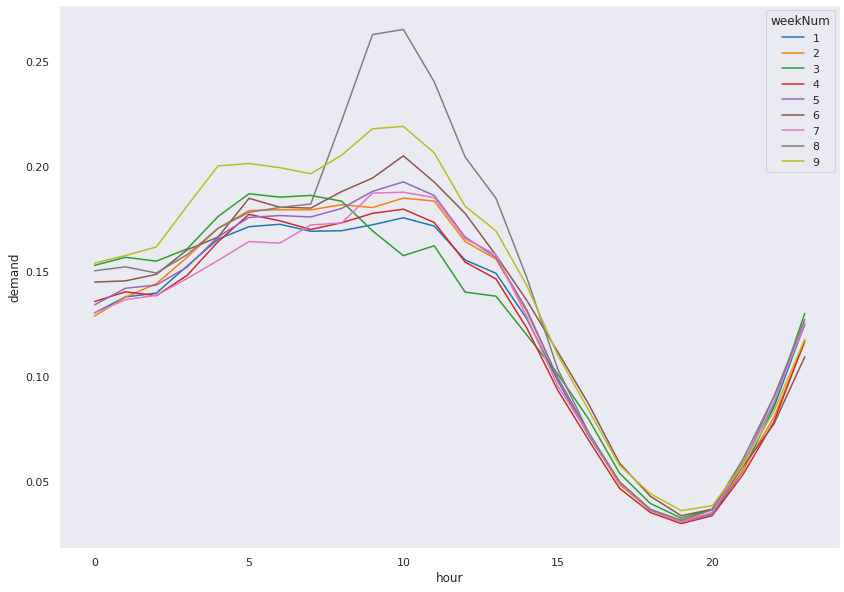

**REGION 2: Breakdown of demand per week**

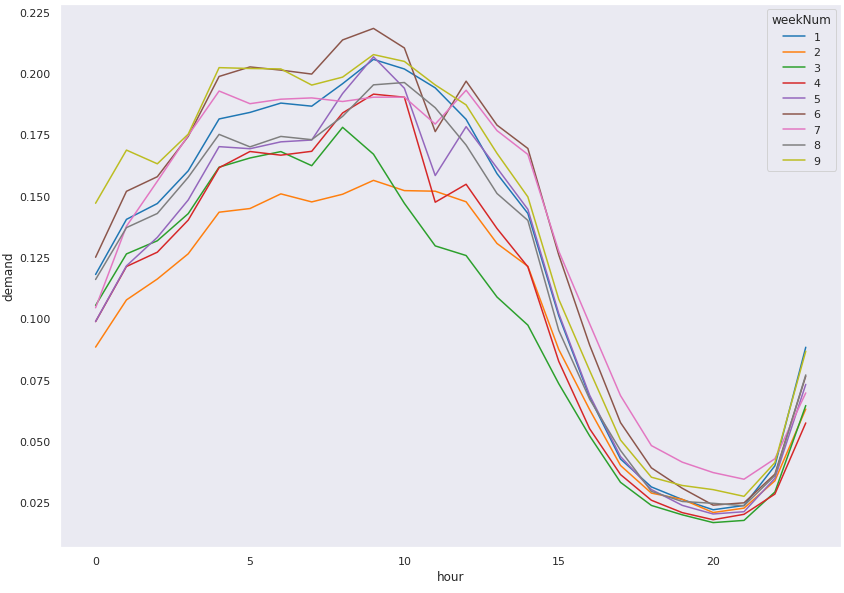

Generally, there is not much change in the demand for region 1 over each week. However, there is a very large spike in the traffic demand in week 8, days 50 to 56 which indicates that week 8 could be part of a school holiday period. 

This is further supported by the fact that week 9 also has a spike in traffic demand, albeit a slightly smaller one.

However, region 2 seems to not show this same trend as the traffic demand in week 8 for region 2 is not the outlier with the highest traffic demand but is instead one of the weeks with an average traffic demand.

Furthermore. the traffic demand in region 2 fluctuates quite a bit from week to week, unlike in region 1 where the average demand seems to be maintained for each week with the exception of week 8

For this region, it seems as though week 6 has the highest traffic demand. In fact, it seems as if the traffic demand starts to rise from week 2 onwards and maintains this constant increase in traffic demand until week 6 whereby it starts to decrease..

**REGION 1: Weekday vs Weekend**

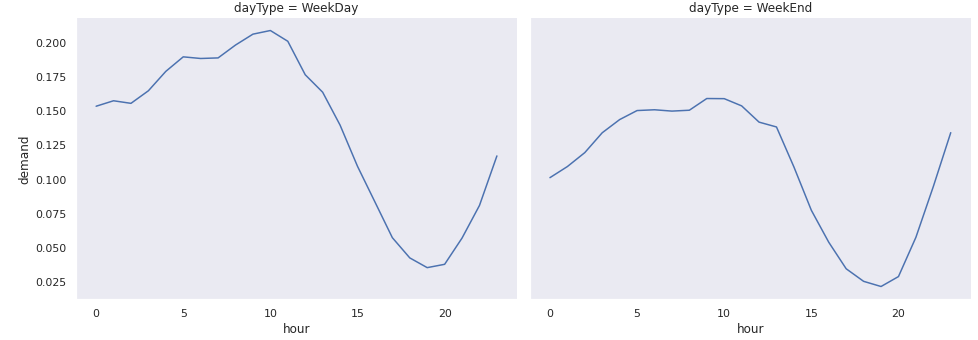

**REGION 2: Weekday vs Weekend**

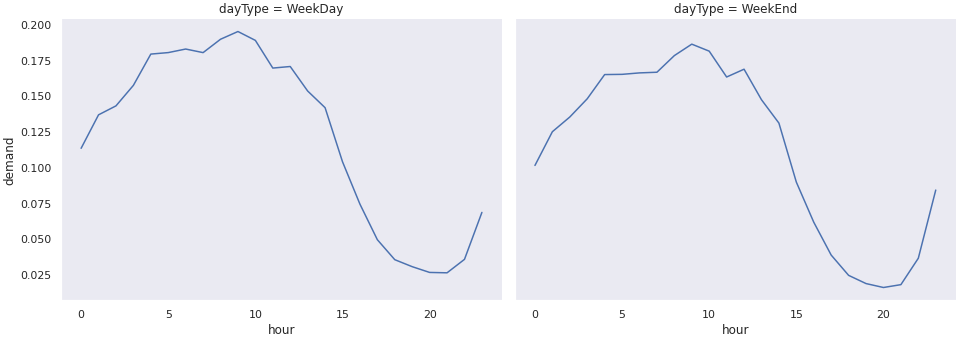

The general trend of the traffic demand over the course of the day remains similar enough that if not for the slight decrease in traffic demand, which only occurs in the mornings, the two line plots could be superimposed onto each other.

However, contrary to our expectations, the traffic demand does not actually increase during the weekends. In fact, it almost seems as if the traffic demand is lower during the weekends as compared to weekdays.

This may be due to the fact that fewer people are rushing during the weekends and thus, they either walk or take public transport which would account for the smaller traffic demand during weekends.

This could also be due to the fact that in SEA, traffic is not as high during weekends, as people do not really have a reason to move around.

**High Demand Regions (Region 1 and 2): Weekly breakdown**

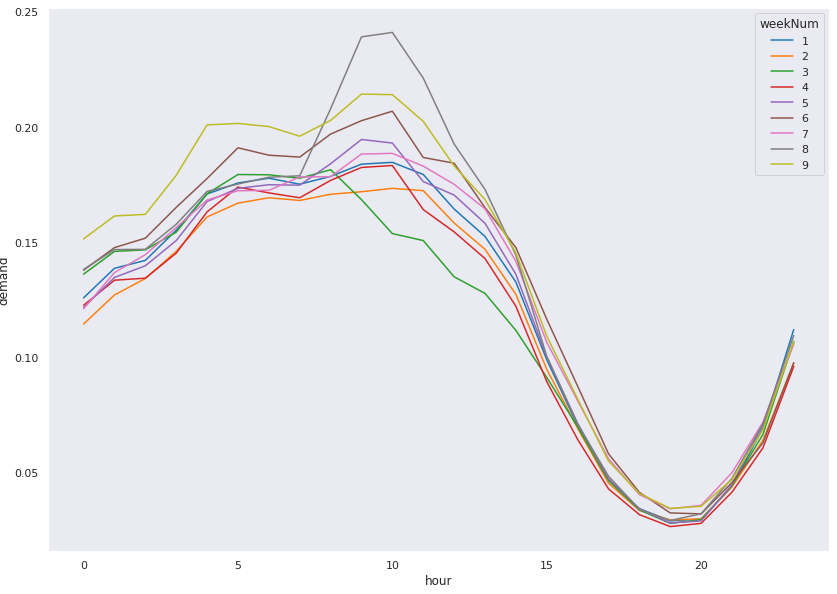

**High Demand Regions (Region 1 and 2): Weekday vs Weekend**

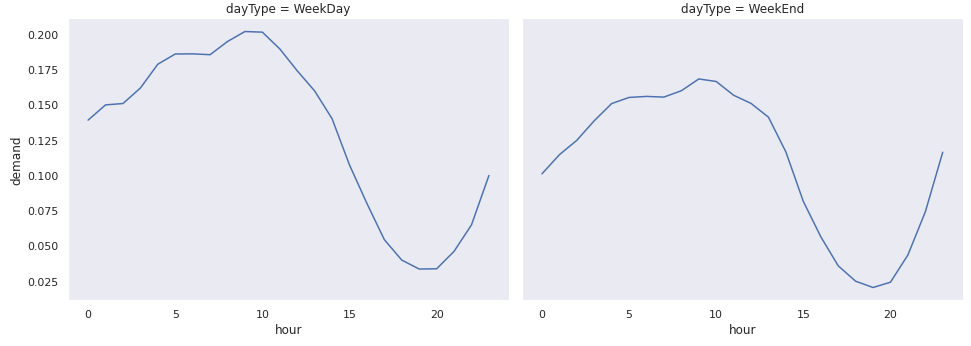

### Low Demand Regions

In [ ]:
animate = FuncAnimation(fig, update, repeat = True, 
                        interval = 600, frames = len(allDays))

HTML(animate.to_html5_video())

In [ ]:
animate = FuncAnimation(fig, update, repeat = True, 
                        interval = 600, frames = len(allDays))

HTML(animate.to_html5_video())

In contrast to high demand regions, the spread of traffic demand doesn't really change much for low demand regions which does not fully support the theory that low demand regions are residential areas as we would expect individuals to move around the region more seeing as they are not stuck in school or in offices.

However, this constant spread in traffic demand could be explained by the fact that movements around a residential area would not change much whether it is a weekday or a weekend as on both types of days, individuals would leave their homes, but for different reasons.

**REGION 3: Breakdown of demand per week**

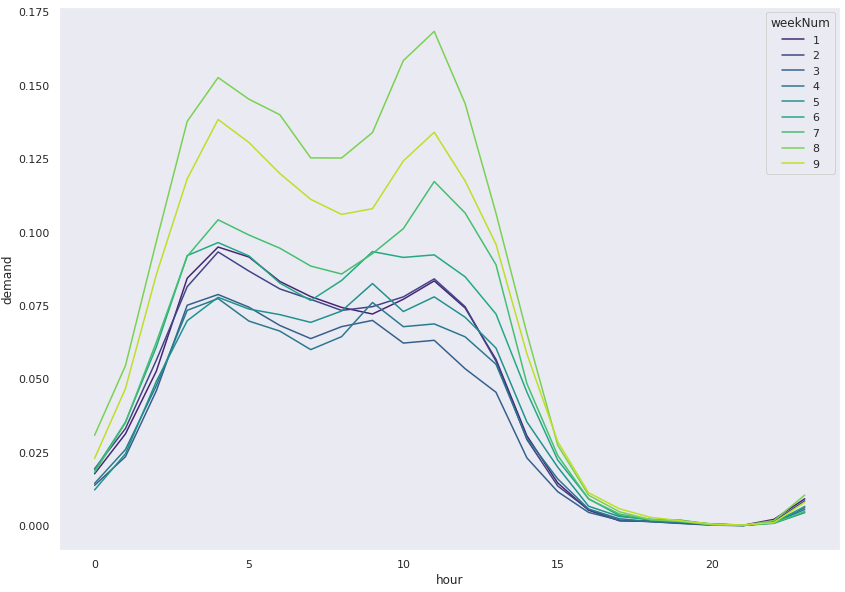

Interestingly, this pattern of demand over the course of a single day is not similar to that of the pattern for regions with high demand.

While the traffic demand does also increase from the start of the day, it actually drops between about 0400 to 0800 which also encompasses the start of the usual morning peak hour period. 

However, the traffic demand does start rising at around 0900 hours until about 1100 hours where the demand start dropping drastically, hitting around 0 demand after 1500 hours.

Of course, this is highly doubtful to be a real projection of the traffic demand over the course of the day. The most likely explanation is that the data for the region after 1500 hours was missing in the original dataset provided and the 0 demand shown is a result of us filling in the missing rows in the dataset.

As such, while we can likely still perform some analysis on this region, it may be better for us to focus on the mornings as well as to not use this region as the general baseline for all regions with low demand.

In fact, this region could very well actually have relatively high demand if the demand during the afternoon, after 1500 hours, follows the same trend as that of the other high demand regions we have seen.

**REGION 4: Breakdown of demand per week**

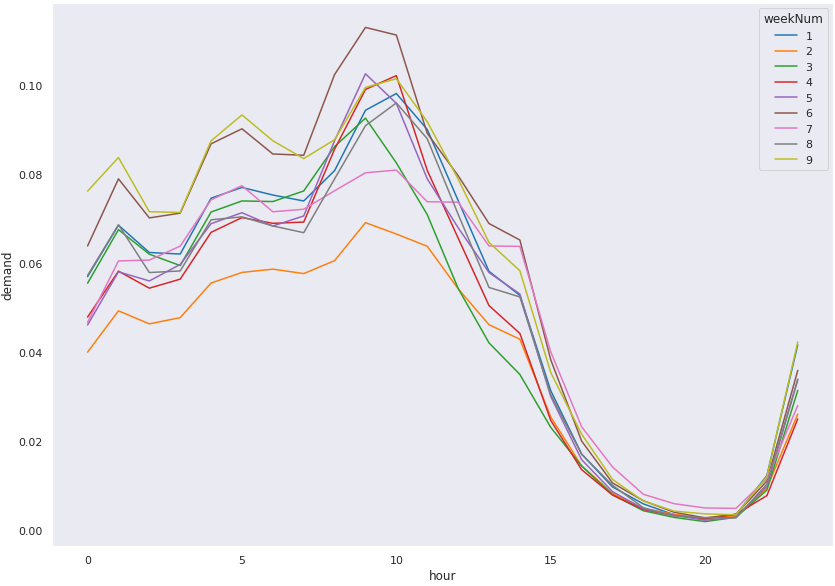

This pattern seems to match up with that of the pattern that regions with relatively high demand seem to have, namely the increasing traffic demand throughout the morning followed by a sharp decrease until the evenings and a continuous increase throughout and into the next day.

However, the pattern in the morning does not match with that of the pattern in the morning for region 3. While region 3 has a minor fluctuation in traffic demand in the morning, this region fluctuates greatly thorughout the morning as it approaches and passes the morning peak hour period. 

In fact, the only time where the traffic demand remains roughly smooth is after 1500 hours where it follows a general 'U' shape.

Interestingly, the traffic demand changes greatly each week for the mornings however, it all smooths back into the same general curve shape and demand after 1500 hours regardless of what the week is.

**REGION 3: Weekday vs Weekend**

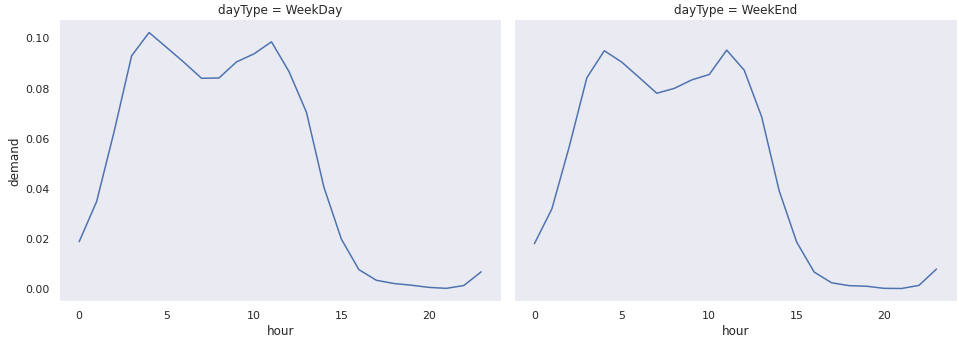

**REGION 4: Weekday vs Weekend**

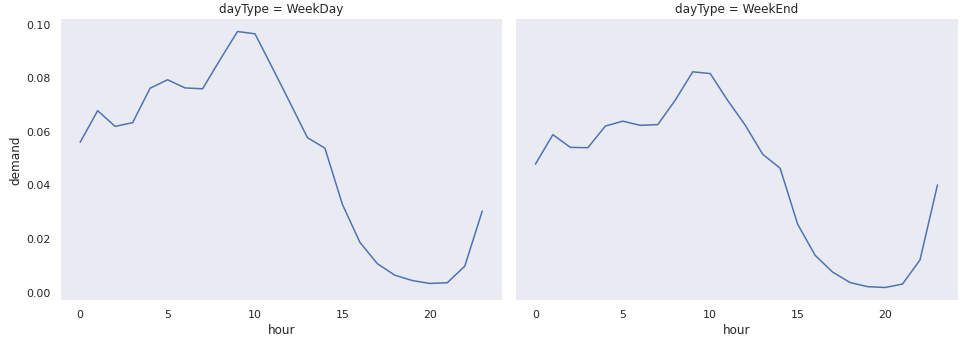

Similar to regions with high demand, the pattern of traffic demand is similar for both weekdays and weekends. 

In fact, there is almost no difference aside from the slight decrease in the traffic demand in the mornings which was also observed in regions with high demand.

This lends more credence to the theory that this region could in fact be classified as a region of high demand if not for the missing rows of data after 1500 hours which decreased the mean demand for the region enough to make it seems as if it was a region with relatively low demand as compared to the other regions.

On the other hand, while there are some differences between region 3 and region 4, thus far, region 4 actually has more similarities to the regions with high demand than region 3, especially in regards to its general trend of traffic demand over the course of a single day.

At this point, we cannot conclude with a 100% certainty that region 3 is actually a region with high demand just based on what we have seen from region 4. 

**Low Demand Regions (Region 3 and 4 mean): Weekly breakdown**




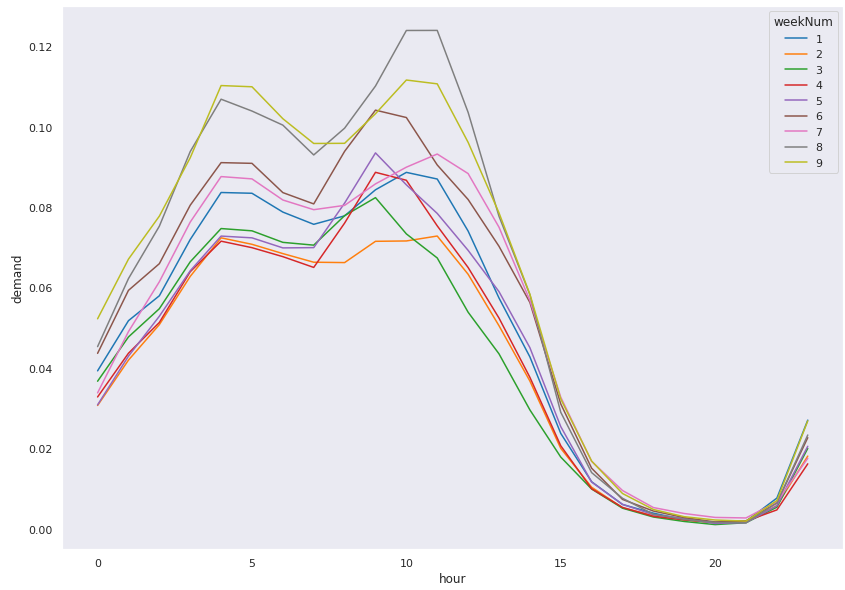

In general, low demand regions seem to have similar traffic demands in the second half of the day, after 1500 hours, regardless of what week it is. However, in direct contrast, the traffic demand in the morning fluctuates greatly depending on the week. 



**Low Demand Regions (Region 3 and 4): Weekday vs Weekend**

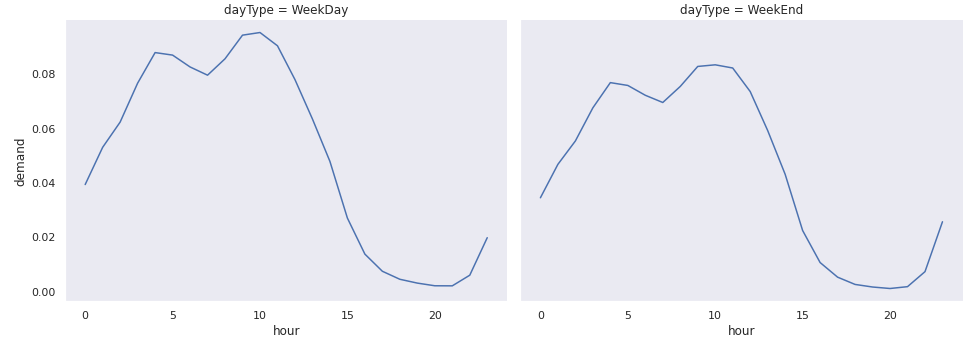

Additionally, like regions with high demand, the pattern for weekdays versus. weekends are the same.

The general trend of the traffic demand over the course of the day remains similar enough that if not for the slight decrease in traffic demand, which only occurs in the mornings, the two line plots could be superimposed onto each other.

In conclusion:
- All regions follow the same general trend with the exception of region 3
  - Region 3 demand is the only to drop to 0 demand
  - Region 3 general trend is algo different in the morning
- Weekday and Weekends have the same general trend
  - No higher demand on the weekends
- Looking at the weekly trends over the day, they follow the same general trend
  - Except region 1, the demand value fluctuates over the weeks

From this we can see:
- Different from our expectations, it seems like all regions do follow a general trend with some offset (CBD regions with just higher overal demand, but same trend nontheless)
  - This could mean that the same strategy can be used regardless of regions, just adjusting it to suit the demand at the time
  - This could be adjusting the pricing, or encouraging drivers to work at those time to meet the demand for rides
- We can also see that by week, probably depnding on events, could also lead to different demand trends with the same overal trend.
  - Further investigation is probably needed to find out if this also could be predicited, to better account for the overal trend in demand.

## Problem Statement 3: Forecast the travel demand for next 15min / 1hour and predict areas with high travel demand

### Getting Region 1 data

In [ ]:
 # getting Region 1 data 
region1 = training_data[training_data['lat'] >= -5.40]
region1 = region1[region1['lat'] <= -5.30]
region1 = region1[region1['lon'] >= 90.60]
region1 = region1[region1['lon'] <= 90.75]
region1

,geohash6,day,timestamp,demand,lon,lat
0,qp03wc,1,20:0,0.004959,90.653687,-5.353088
1,qp03wc,1,14:30,0.272885,90.653687,-5.353088
2,qp03wc,1,6:15,0.308053,90.653687,-5.353088
3,qp03wc,1,5:0,0.253679,90.653687,-5.353088
4,qp03wc,1,4:0,0.267803,90.653687,-5.353088
...,...,...,...,...,...,...
7319995,qp098v,61,19:45,0.000000,90.741577,-5.331116
7319996,qp098v,61,19:0,0.000000,90.741577,-5.331116
7319997,qp098v,61,0:0,0.000000,90.741577,-5.331116
7319998,qp098v,61,17:30,0.000000,90.741577,-5.331116


### Data preparation (Sliding Window)

In [ ]:
# convert the timestamps to datetime
region1["timestamp"] =  pd.to_datetime(region1["timestamp"], format='%H:%M').dt.time

region1

,geohash6,day,timestamp,demand,lon,lat
0,qp03wc,1,20:00:00,0.004959,90.653687,-5.353088
1,qp03wc,1,14:30:00,0.272885,90.653687,-5.353088
2,qp03wc,1,06:15:00,0.308053,90.653687,-5.353088
3,qp03wc,1,05:00:00,0.253679,90.653687,-5.353088
4,qp03wc,1,04:00:00,0.267803,90.653687,-5.353088
...,...,...,...,...,...,...
7319995,qp098v,61,19:45:00,0.000000,90.741577,-5.331116
7319996,qp098v,61,19:00:00,0.000000,90.741577,-5.331116
7319997,qp098v,61,00:00:00,0.000000,90.741577,-5.331116
7319998,qp098v,61,17:30:00,0.000000,90.741577,-5.331116


We would be using the data from one geohash that has the highest mean demand from region 1 to train the regression models since we are predicting on high demand

Note that the model would be trained on every timestamp of every of the 61 days

In [ ]:
region1.groupby("geohash6")["demand"].mean().sort_values(ascending=False)

geohash6
qp03xx    0.751653
qp03xw    0.745806
qp03yb    0.694499
qp03xm    0.680359
qp03wz    0.677979
            ...   
qp03qp    0.000399
qp03y4    0.000225
qp03vc    0.000171
qp098v    0.000083
qp03vf    0.000081
Name: demand, Length: 217, dtype: float64

In [ ]:
high_demand_geohash = region1[region1["geohash6"] == "qp03xx"]

# sort the values by day and timestamp

high_demand_geohash = high_demand_geohash.sort_values(["day", "timestamp"],ascending=True)

In [ ]:
high_demand_geohash["timestamp"] = high_demand_geohash["timestamp"].apply(lambda x: x.strftime('%H:%M'))
high_demand_geohash.index = np.arange(0, len(high_demand_geohash))
high_demand_geohash

,geohash6,day,timestamp,demand,lon,lat
0,qp03xx,1,00:00,0.320478,90.686646,-5.320129
1,qp03xx,1,00:15,0.351964,90.686646,-5.320129
2,qp03xx,1,00:30,0.386225,90.686646,-5.320129
3,qp03xx,1,00:45,0.357434,90.686646,-5.320129
4,qp03xx,1,01:00,0.376079,90.686646,-5.320129
...,...,...,...,...,...,...
5851,qp03xx,61,22:45,0.188155,90.686646,-5.320129
5852,qp03xx,61,23:00,0.167299,90.686646,-5.320129
5853,qp03xx,61,23:15,0.181768,90.686646,-5.320129
5854,qp03xx,61,23:30,0.230112,90.686646,-5.320129


Let's use the sliding window approach to restructure the time series into supervised learning problem

The reason for this is so that we can use traditional ML models to do the forecasting

For example, what the sliding window does is convert the time series, which look like this:

| Time   | Measure |
| -------| ------- |
| 1      | 100     |
| 2      | 110     |
| 3      | 108     |
| 4      | 115     |
| 5      | 120     |

and restructured into this:

| X (feature)    | y (labels) |
| -------        | -------    |
| ?              | 100        |
| 100            | 110        |
| 110            | 108        |
| 108            | 115        |
| 115            | 120        |
| 120            | ?          |

The feature, X is the previous time step and the next time step is the label, y

Using the sliding window, the order of the time series demand data is preserved, while allowing for traditional supervised learning models to be used for time series

In our case, we would do a sliding window step of 1, due to forecasting of the next 15 minutes

Note that we would be removing the first and last row of the transformed time data, due to not being able to know the previous time step of the first time step (for the first row) and not knowing the next time step for the last row


In [ ]:
high_demand_geohash[["timestamp", "demand"]]

,timestamp,demand
0,00:00,0.320478
1,00:15,0.351964
2,00:30,0.386225
3,00:45,0.357434
4,01:00,0.376079
...,...,...
5851,22:45,0.188155
5852,23:00,0.167299
5853,23:15,0.181768
5854,23:30,0.230112


In [ ]:
X_feature = pd.Series(high_demand_geohash["demand"].shift(), name="X")
# Remove the first NaN
X_feature = X_feature.drop([0])
X_feature

1       0.320478
2       0.351964
3       0.386225
4       0.357434
5       0.376079
          ...   
5851    0.190247
5852    0.188155
5853    0.167299
5854    0.181768
5855    0.230112
Name: X, Length: 5855, dtype: float64

In [ ]:
y_label = pd.Series(high_demand_geohash["demand"], name="y")
y_label = y_label.drop([0])
y_label

1       0.351964
2       0.386225
3       0.357434
4       0.376079
5       0.432797
          ...   
5851    0.188155
5852    0.167299
5853    0.181768
5854    0.230112
5855    0.212988
Name: y, Length: 5855, dtype: float64

In [ ]:
restructured_data = pd.concat([X_feature, y_label], axis=1)
restructured_data

,X,y
1,0.320478,0.351964
2,0.351964,0.386225
3,0.386225,0.357434
4,0.357434,0.376079
5,0.376079,0.432797
...,...,...
5851,0.190247,0.188155
5852,0.188155,0.167299
5853,0.167299,0.181768
5854,0.181768,0.230112


In [ ]:
# Split the training data into 80% training, 20% test
training = restructured_data.iloc[:4685,:]
testing = restructured_data.iloc[4685:,:]

In [ ]:
training

,X,y
1,0.320478,0.351964
2,0.351964,0.386225
3,0.386225,0.357434
4,0.357434,0.376079
5,0.376079,0.432797
...,...,...
4681,0.277573,0.166008
4682,0.166008,0.174010
4683,0.174010,0.217608
4684,0.217608,0.211948


In [ ]:
testing

,X,y
4686,0.139234,0.117363
4687,0.117363,0.109064
4688,0.109064,0.186422
4689,0.186422,0.131396
4690,0.131396,0.137134
...,...,...
5851,0.190247,0.188155
5852,0.188155,0.167299
5853,0.167299,0.181768
5854,0.181768,0.230112


In [ ]:
X_train = training["X"].values.reshape(-1, 1)
y_train = training["y"].values

X_test = testing["X"].values.reshape(-1, 1)
y_test = testing["y"].values

### Model Training

Due to the no free lunch theorem, we would have to try an array of regressors to determine which is best for the problem. 

As such, we would be using:
- Support Vector Regressor
- K-Nearest Neighbour Regressor
- Decision Trees Regressor
- Random Forest Regressor
- Multi Layer Perceptron or Artificial Neural Network
- Linear Regression
- Gradient Boosting Regressor (GBR)

In [ ]:
# array to store all the different dicts of r2 scores of different models
models_r2_scores = []

# Getting all the different regressors
# SVR
from sklearn.svm import SVR
svr_model = SVR()

# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor() 

# Decision Tree Regressor
from sklearn import tree
decision_tree_model = tree.DecisionTreeRegressor(random_state=1)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)

# MLP
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(random_state=1)

# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=1)

# array to store all the models
models = [svr_model, knn_model, decision_tree_model, rf_model, mlp_model, lr_model, gbr_model]

# array containing all the names of models in order
model_names = ["SVR", "KNN", "Decision Tree", "Random Forest", "MLP", "Linear Regression", "GBR"]

for i in range(len(models)):
  # Train each of the models
  models[i].fit(X_train, y_train)
  # Generate the name of the model
  models_r2_scores.append({
    "regressor": model_names[i],
    "training": models[i].score(X_train, y_train),
    "test": models[i].score(X_test, y_test)
  })

In [ ]:
# Display the summary of r2 scores for all the models
# dataframe to store the summary of scores
summary_scores = pd.DataFrame(models_r2_scores)

# Create new column to find difference in r2 scores of models on training set vs test set
summary_scores["diff"] = summary_scores["training"] - summary_scores["test"]
summary_scores.sort_values(["training"], ascending=False)

,regressor,training,test,diff
2,Decision Tree,0.994205,0.958981,0.035224
3,Random Forest,0.989825,0.969631,0.020194
1,KNN,0.977169,0.974262,0.002907
6,GBR,0.975853,0.977575,-0.001721
5,Linear Regression,0.972135,0.978245,-0.006110
4,MLP,0.972053,0.978028,-0.005976
0,SVR,0.924549,0.919645,0.004904


All the models seem to be good predictors with above 0.90 training and test accuracies, however the difference between the training and test scores were the smallest for the GBR, which suggest that this model would be the  best generaliser hence we would use that model as our final one

Let's see the predictions of demands made by the GBR

In [ ]:
# load the saved model
import pickle
gbr_model = pickle.loads(open("./time_series_gbr.pkl", "rb").read())

In [ ]:
# get all the predictions of demand by GBR
preds = gbr_model.predict(high_demand_geohash["demand"].values.reshape(-1, 1))

In [ ]:
# add the predictions to the high demand geohash
high_demand_geohash["preds"] = pd.Series(preds).shift()

In [ ]:
high_demand_geohash

,geohash6,day,timestamp,demand,lon,lat,preds
0,qp03xx,1,00:00,0.320478,90.686646,-5.320129,NaN
1,qp03xx,1,00:15,0.351964,90.686646,-5.320129,0.316166
2,qp03xx,1,00:30,0.386225,90.686646,-5.320129,0.345264
3,qp03xx,1,00:45,0.357434,90.686646,-5.320129,0.390756
4,qp03xx,1,01:00,0.376079,90.686646,-5.320129,0.367595
...,...,...,...,...,...,...,...
5851,qp03xx,61,22:45,0.188155,90.686646,-5.320129,0.193616
5852,qp03xx,61,23:00,0.167299,90.686646,-5.320129,0.193616
5853,qp03xx,61,23:15,0.181768,90.686646,-5.320129,0.170722
5854,qp03xx,61,23:30,0.230112,90.686646,-5.320129,0.187587


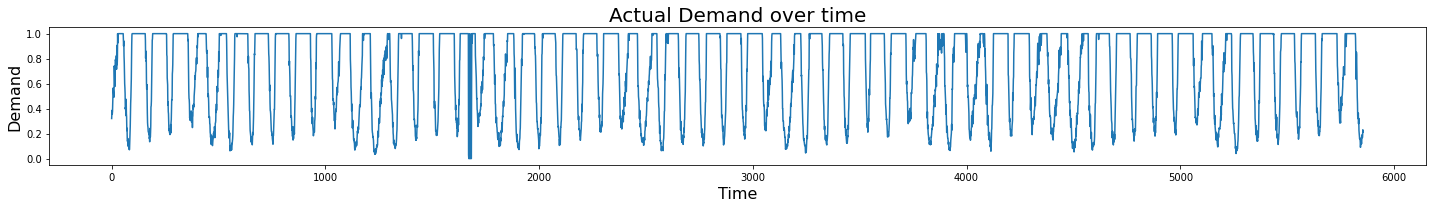

In [ ]:
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=np.arange(0, len(high_demand_geohash)), y="demand", data=high_demand_geohash)
# ax.set_xticklabels(ax.get_xticklabels())
# adding the title
plt.title("Actual Demand over time", fontsize=20)
# adding x/y labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("Demand", fontsize=16)
plt.tight_layout()
plt.show()

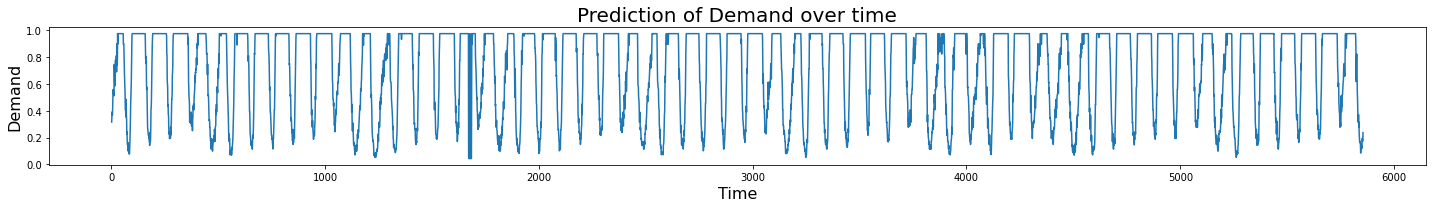

In [ ]:
plt.figure(figsize=(20, 3))
ax = sns.lineplot(x=np.arange(0, len(high_demand_geohash)), y="preds", data=high_demand_geohash)
# ax.set_xticklabels(ax.get_xticklabels())
# adding the title
plt.title("Prediction of Demand over time", fontsize=20)
# adding x/y labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("Demand", fontsize=16)
plt.tight_layout()
plt.show()

From the graphs, the GBR seems to predict / forecast all the demand over time almost exactly like the actual demand

Let's test the GBR out by giving it the demand of another geohash

In [ ]:
high_demand_geohash_2 = region1[region1["geohash6"] == "qp03w1"]

# sort the values by day and timestamp
high_demand_geohash_2 = high_demand_geohash_2.sort_values(["day", "timestamp"],ascending=True)

In [ ]:
high_demand_geohash_2

,geohash6,day,timestamp,demand,lon,lat
2090685,qp03w1,1,00:00:00,0.047240,90.620728,-5.353088
2090616,qp03w1,1,00:15:00,0.084070,90.620728,-5.353088
2090637,qp03w1,1,00:30:00,0.081307,90.620728,-5.353088
2090648,qp03w1,1,00:45:00,0.074663,90.620728,-5.353088
2090670,qp03w1,1,01:00:00,0.071727,90.620728,-5.353088
...,...,...,...,...,...,...
2096395,qp03w1,61,22:45:00,0.036728,90.620728,-5.353088
2096427,qp03w1,61,23:00:00,0.047324,90.620728,-5.353088
2096418,qp03w1,61,23:15:00,0.050498,90.620728,-5.353088
2096406,qp03w1,61,23:30:00,0.049589,90.620728,-5.353088


In [ ]:
high_demand_geohash_2["timestamp"] = high_demand_geohash_2["timestamp"].apply(lambda x: x.strftime('%H:%M'))
high_demand_geohash_2.index = np.arange(0, len(high_demand_geohash_2))
high_demand_geohash_2

,geohash6,day,timestamp,demand,lon,lat
0,qp03w1,1,00:00,0.047240,90.620728,-5.353088
1,qp03w1,1,00:15,0.084070,90.620728,-5.353088
2,qp03w1,1,00:30,0.081307,90.620728,-5.353088
3,qp03w1,1,00:45,0.074663,90.620728,-5.353088
4,qp03w1,1,01:00,0.071727,90.620728,-5.353088
...,...,...,...,...,...,...
5851,qp03w1,61,22:45,0.036728,90.620728,-5.353088
5852,qp03w1,61,23:00,0.047324,90.620728,-5.353088
5853,qp03w1,61,23:15,0.050498,90.620728,-5.353088
5854,qp03w1,61,23:30,0.049589,90.620728,-5.353088


In [ ]:
# get all the predictions of demand by GBR
preds_2 = gbr_model.predict(high_demand_geohash_2["demand"].values.reshape(-1, 1))

In [ ]:
# add the predictions to the high demand geohash
high_demand_geohash_2["preds"] = pd.Series(preds_2).shift()

In [ ]:
high_demand_geohash_2

,geohash6,day,timestamp,demand,lon,lat,preds
0,qp03w1,1,00:00,0.047240,90.620728,-5.353088,NaN
1,qp03w1,1,00:15,0.084070,90.620728,-5.353088,0.051142
2,qp03w1,1,00:30,0.081307,90.620728,-5.353088,0.088871
3,qp03w1,1,00:45,0.074663,90.620728,-5.353088,0.088080
4,qp03w1,1,01:00,0.071727,90.620728,-5.353088,0.081531
...,...,...,...,...,...,...,...
5851,qp03w1,61,22:45,0.036728,90.620728,-5.353088,0.043379
5852,qp03w1,61,23:00,0.047324,90.620728,-5.353088,0.052285
5853,qp03w1,61,23:15,0.050498,90.620728,-5.353088,0.051142
5854,qp03w1,61,23:30,0.049589,90.620728,-5.353088,0.063476


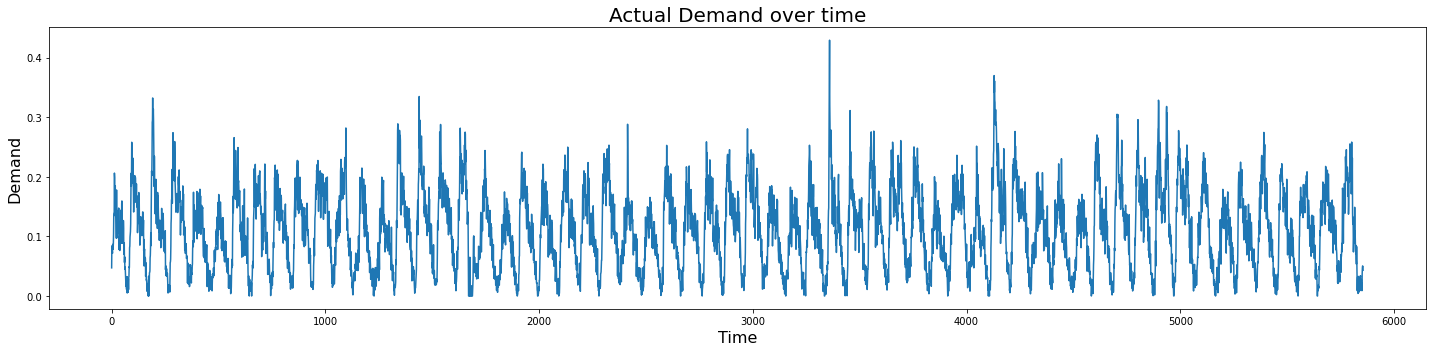

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=np.arange(0, len(high_demand_geohash_2)), y="demand", data=high_demand_geohash_2)
# adding the title
plt.title("Actual Demand over time", fontsize=20)
# adding x/y labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("Demand", fontsize=16)
plt.tight_layout()
plt.show()

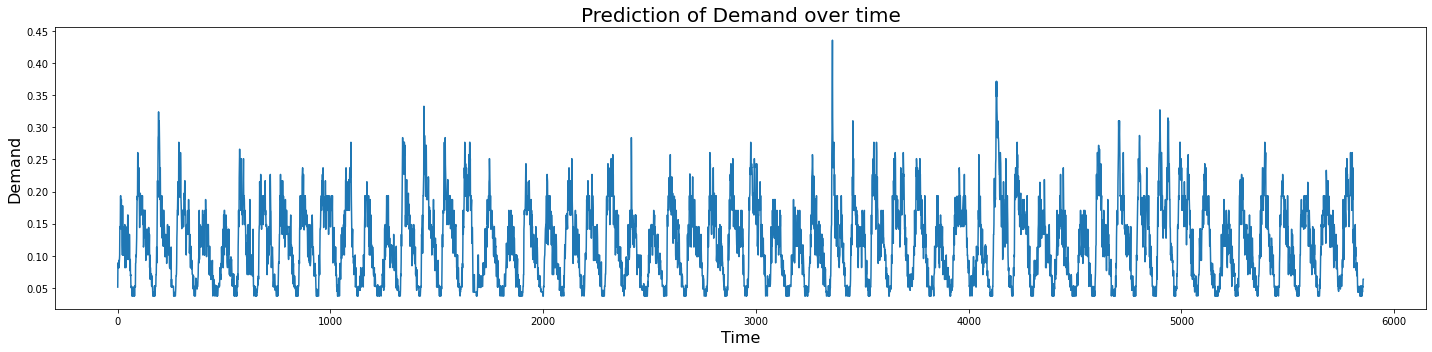

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=np.arange(0, len(high_demand_geohash_2)), y="preds", data=high_demand_geohash_2)
# adding the title
plt.title("Prediction of Demand over time", fontsize=20)
# adding x/y labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("Demand", fontsize=16)
plt.tight_layout()
plt.show()

Again, the GBR seems to be accurately forecasting the time series of this geohash accurately. Let's see how the model would fare on a geohash with lower demand

In [ ]:
low_demand_geohash = training_data[training_data["geohash6"] == "qp03qr"]

In [ ]:
low_demand_geohash

,geohash6,day,timestamp,demand,lon,lat
4772640,qp03qr,1,20:0,0.000000,90.631714,-5.364075
4772641,qp03qr,1,14:30,0.010191,90.631714,-5.364075
4772642,qp03qr,1,6:15,0.015597,90.631714,-5.364075
4772643,qp03qr,1,5:0,0.010706,90.631714,-5.364075
4772644,qp03qr,1,4:0,0.013161,90.631714,-5.364075
...,...,...,...,...,...,...
4778491,qp03qr,61,19:45,0.000000,90.631714,-5.364075
4778492,qp03qr,61,19:0,0.000000,90.631714,-5.364075
4778493,qp03qr,61,0:0,0.008734,90.631714,-5.364075
4778494,qp03qr,61,17:30,0.000000,90.631714,-5.364075


In [ ]:
low_demand_geohash["timestamp"] =  pd.to_datetime(low_demand_geohash["timestamp"], format='%H:%M').dt.time

low_demand_geohash

,geohash6,day,timestamp,demand,lon,lat
4772733,qp03qr,1,00:00:00,0.000000,90.631714,-5.364075
4772664,qp03qr,1,00:15:00,0.000000,90.631714,-5.364075
4772685,qp03qr,1,00:30:00,0.000000,90.631714,-5.364075
4772696,qp03qr,1,00:45:00,0.016894,90.631714,-5.364075
4772655,qp03qr,1,10:00:00,0.000000,90.631714,-5.364075
...,...,...,...,...,...,...
4778465,qp03qr,61,08:45:00,0.017994,90.631714,-5.364075
4778423,qp03qr,61,09:00:00,0.029963,90.631714,-5.364075
4778409,qp03qr,61,09:15:00,0.019211,90.631714,-5.364075
4778430,qp03qr,61,09:30:00,0.003758,90.631714,-5.364075


In [ ]:
# sort the values by day and timestamp
low_demand_geohash = low_demand_geohash.sort_values(["day", "timestamp"],ascending=True)

In [ ]:
low_demand_geohash["timestamp"] = low_demand_geohash["timestamp"].apply(lambda x: x.strftime('%H:%M'))
low_demand_geohash.index = np.arange(0, len(low_demand_geohash))
low_demand_geohash

,geohash6,day,timestamp,demand,lon,lat
0,qp03qr,1,00:00,0.000000,90.631714,-5.364075
1,qp03qr,1,00:15,0.000000,90.631714,-5.364075
2,qp03qr,1,00:30,0.000000,90.631714,-5.364075
3,qp03qr,1,00:45,0.016894,90.631714,-5.364075
4,qp03qr,1,01:00,0.012177,90.631714,-5.364075
...,...,...,...,...,...,...
5851,qp03qr,61,22:45,0.000000,90.631714,-5.364075
5852,qp03qr,61,23:00,0.000000,90.631714,-5.364075
5853,qp03qr,61,23:15,0.000000,90.631714,-5.364075
5854,qp03qr,61,23:30,0.000000,90.631714,-5.364075


In [ ]:
# get all the predictions of demand by GBR
preds_3 = gbr_model.predict(low_demand_geohash["demand"].values.reshape(-1, 1))

In [ ]:
# add the predictions to the high demand geohash
low_demand_geohash["preds"] = pd.Series(preds_3).shift()

In [ ]:
low_demand_geohash

,geohash6,day,timestamp,demand,lon,lat,preds
0,qp03qr,1,00:00,0.000000,90.631714,-5.364075,NaN
1,qp03qr,1,00:15,0.000000,90.631714,-5.364075,0.142558
2,qp03qr,1,00:30,0.000000,90.631714,-5.364075,0.142558
3,qp03qr,1,00:45,0.016894,90.631714,-5.364075,0.142558
4,qp03qr,1,01:00,0.012177,90.631714,-5.364075,0.026936
...,...,...,...,...,...,...,...
5851,qp03qr,61,22:45,0.000000,90.631714,-5.364075,0.142558
5852,qp03qr,61,23:00,0.000000,90.631714,-5.364075,0.142558
5853,qp03qr,61,23:15,0.000000,90.631714,-5.364075,0.142558
5854,qp03qr,61,23:30,0.000000,90.631714,-5.364075,0.142558


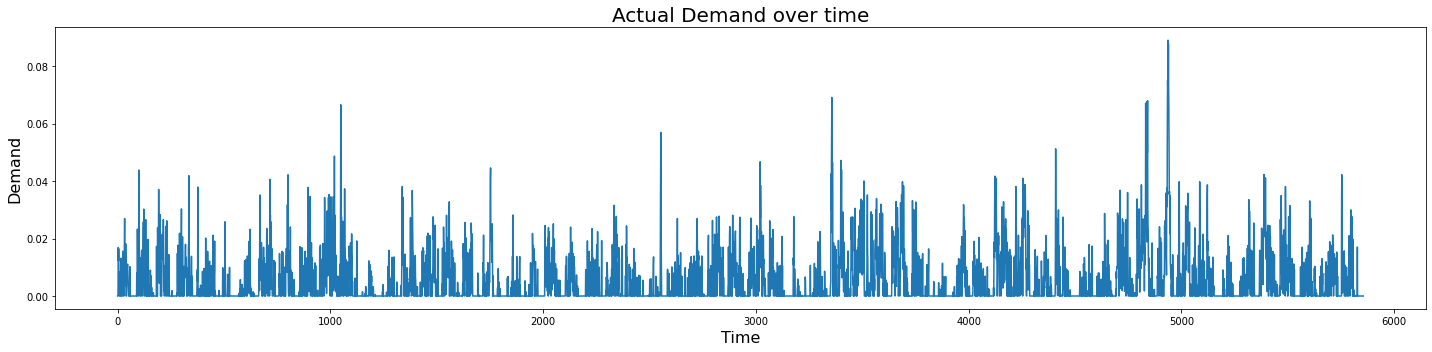

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=np.arange(0, len(low_demand_geohash)), y="demand", data=low_demand_geohash)
# adding the title
plt.title("Actual Demand over time", fontsize=20)
# adding x/y labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("Demand", fontsize=16)
plt.tight_layout()
plt.show()

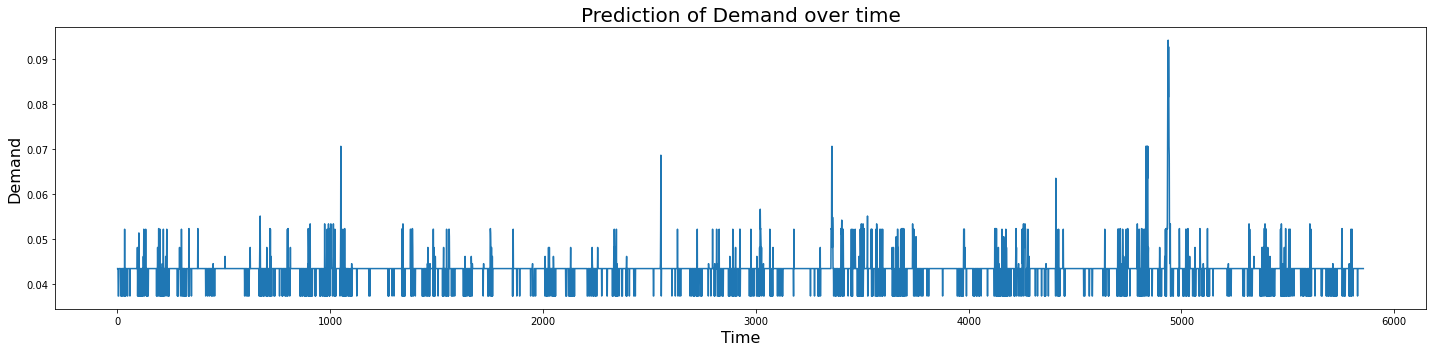

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=np.arange(0, len(low_demand_geohash)), y="preds", data=low_demand_geohash)
# adding the title
plt.title("Prediction of Demand over time", fontsize=20)
# adding x/y labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("Demand", fontsize=16)
plt.tight_layout()
plt.show()

Now we can see that the model is not able to forecast geohashes for low demand that accurately, as seen from the regions significantly lower demand forecasted for the actual regions low demand.

### Evaluation

Let' use some metrics to evaluate the performance of the model

First, we would use RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

# RMSE of the Gradient Boosting Regressor on the training set
rmse_train = mean_squared_error(y_train, gbr_model.predict(X_train), squared=False)

# RMSE of the Gradient Boosting Regressor on the test set
rmse_test = mean_squared_error(y_test, gbr_model.predict(X_test), squared=False)

# print out all the respective RMSE
print(f"Root Mean Square Error of GBR on training set: {rmse_train}")
print(f"Root Mean Square Error of GBR on test set: {rmse_test}")

Root Mean Square Error of GBR on training set: 0.05766612487373278
Root Mean Square Error of GBR on test set: 0.050886765165090574


In [ ]:
high_demand_geohash["demand"].describe()

count    5856.000000
mean        0.751653
std         0.327006
min         0.000000
25%         0.445603
50%         1.000000
75%         1.000000
max         1.000000
Name: demand, dtype: float64

The value of the RMSE of 0.054 on the training set and 0.057 on the test set is very small, when comparing those RMSE values to the standard deviation of the demand of the geohash, which is 0.25. 

This shows that the demands predicted do not deviate much from the actual demands. Hence this shows that the model is forecasting demand accurately with low amount of errors

Second, let's see the residual plot

In [ ]:
# get all the predictions
y_hat = gbr_model.predict(X_test)
# get all the residuals
residuals = y_test - y_hat
residuals

array([-0.02763112, -0.00797609,  0.07287157, ...,  0.01104608,
        0.04252573, -0.02404413])

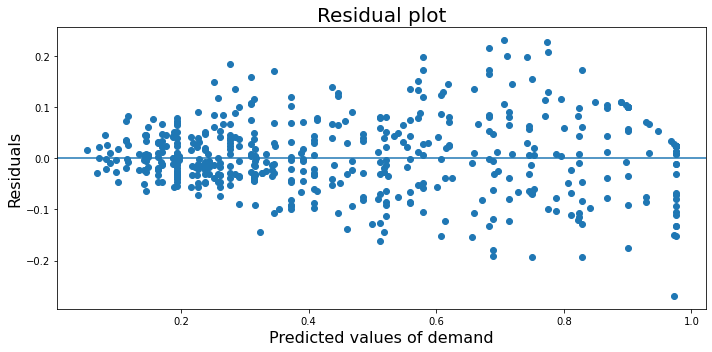

In [ ]:
# plot the residual plot
plt.figure(figsize=(10, 5))
plt.scatter(x=y_hat, y=residuals)
plt.axhline(y=0)
# adding the title
plt.title("Residual plot", fontsize=20)
# adding x/y labels
plt.xlabel("Predicted values of demand", fontsize=16)
plt.ylabel("Residuals", fontsize=16)
plt.tight_layout()
plt.show()

Taking into account that the demand is a value between 0 and 1, 

From the residual plot above,

- the data points in the residual plot are symmetrically distributed, tending to cluster towards the middle of the plot.

- the data points are clustered around where y = 0, most of the residuals are within the range of -0.1 to 0.1. 

- there does not seem to have any clear patterns in the plot

- the majority of the predicted values for demand by the GBR is close to the actual demand, as most of the residuals are quite close to 0

The GBR model prediction errors are quite minimal

### How to forecast the travel demand

In order to do forecasting of the travel demand, the GBR model can be given the demand of the current time and it will output the demand of the next 15 minutes.

The demand given (input) must be a 2-dimensional numpy array. 

The output would be a numpy array containing the predicted demand for next 15 minutes

In [ ]:
# Example input
inputs = high_demand_geohash["demand"].values.reshape(-1, 1)
inputs

array([[0.32047768],
       [0.35196357],
       [0.38622463],
       ...,
       [0.18176804],
       [0.23011244],
       [0.21298804]])

In [ ]:
# Example output
preds = gbr_model.predict(inputs)
preds

array([0.316166  , 0.34526377, 0.39075649, ..., 0.18758671, 0.23703218,
       0.21529425])

In conclusion:
- We managed to use the sliding approach to generate a successful model
  - Furthermore, we only needed training samples from 1 geohash
  - This is likely due to the fact that all regions and geohash follow the same trend. As such the model was able to learn and generalise to the trend allowing it to predict and forecast accurately.
  - This was also the reason why we decided against using deep learning approaches, as we felt we did not have enough data or complexity


# Our process of dealing with the problem

Before we started on the Problem Statements, there were some Feature Engineering and Data Manipulation that we had to do.

Namely:
1. Filling in missing rows of data
2. Adding a latitude and longitude column
3. Separating the timestamp into hours and minutes
4. Based on the day, obtaining whether the data point is a weekday or a weekend as well as the week number whereby week 1 is days 1 to 7.

## Filling in missing rows of data

Originally, there are currently only 4,206,321 rows of data provided in the .csv file.

In [ ]:
train = pd.read_csv('training.csv', sep = ',')
train

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468
...,...,...,...,...
4206316,qp03y1,39,13:0,0.012731
4206317,qp097e,23,18:45,0.083179
4206318,qp03m6,32,12:15,0.123260
4206319,qp02zv,42,5:15,0.120100


However, there should theorectically be 7,782,624 rows of data. ( 1329 unique geohashs * 61 days * 24 hours * 4 ). 

As instructed by the teachers-in-charge, we shall treat all the missing rows of data as data whereby the demand at that point in time is 0. Thus, as there is a difference between having no rows of data and having data whereby the demand is 0, we shall move to fill in the missing rows of data.

In order to fill in the data, we will first create an empty Pandas DataFrame with the appropriate formatting and columns before slotting in the data from the training.csv file into the empty DataFrame.

In [ ]:
new = train.copy()
days = []
tss = []
hss = []
for hash in new['geohash6'].unique():
  for day in allDays:
    for time in uniqueTimestamps:
      days += [day]
      tss += [time]
      hss += [hash]

print(len(days))
print(len(tss))

7782624
7782624


In [ ]:
df = [hss, days, tss]
df = np.array(df)
df = df.T
df = pd.DataFrame(df, columns=['geohash6', 'day', 'timestamp'])
df = df.astype({'day': int})
df['demand'] = 0

In [ ]:
new = df.copy()
new = new.set_index(['geohash6', 'day', 'timestamp'])
new_1 = train.set_index(['geohash6', 'day', 'timestamp'])
new.loc[new_1.index] = new_1

In [ ]:
new = new.reset_index()

In [ ]:
train_df = new
train_df

,geohash6,day,timestamp,demand
0,qp03wc,1,20:0,0.004959
1,qp03wc,1,14:30,0.272885
2,qp03wc,1,6:15,0.308053
3,qp03wc,1,5:0,0.253679
4,qp03wc,1,4:0,0.267803
...,...,...,...,...
7782619,qp0d45,61,19:45,0.000000
7782620,qp0d45,61,19:0,0.000000
7782621,qp0d45,61,0:0,0.000000
7782622,qp0d45,61,17:30,0.000000


## Adding a latitude and longitude column

In [ ]:
uniqueGeohash = train_df.geohash6.unique()

In [ ]:
# Creating two empty columns that will
# hold the value of the lat and long coordinates
train_df['lon'] = ''
train_df['lat'] = ''

In [ ]:
for geohash6 in uniqueGeohash:
  train_df['lat'] = np.where((train_df.geohash6 == geohash6), geohash.decode(geohash6)[0], train_df.lat)
  train_df['lon'] = np.where((train_df.geohash6 == geohash6), geohash.decode(geohash6)[1], train_df.lon)

In [ ]:
train_df

,geohash6,day,timestamp,demand,lon,lat
0,qp03wc,1,20:0,0.004959,90.6536865234375,-5.35308837890625
1,qp03wc,1,14:30,0.272885,90.6536865234375,-5.35308837890625
2,qp03wc,1,6:15,0.308053,90.6536865234375,-5.35308837890625
3,qp03wc,1,5:0,0.253679,90.6536865234375,-5.35308837890625
4,qp03wc,1,4:0,0.267803,90.6536865234375,-5.35308837890625
...,...,...,...,...,...,...
7782619,qp0d45,61,19:45,0.000000,90.7965087890625,-5.25421142578125
7782620,qp0d45,61,19:0,0.000000,90.7965087890625,-5.25421142578125
7782621,qp0d45,61,0:0,0.000000,90.7965087890625,-5.25421142578125
7782622,qp0d45,61,17:30,0.000000,90.7965087890625,-5.25421142578125


## Separating the timestamp into hours and minutes


In [ ]:
splitTime = train_df.timestamp.str.split(':', expand = True)

In [ ]:
timeDf = train_df
timeDf['hour'] = splitTime[0].astype(int)
timeDf['minute'] = splitTime[1].astype(int)
timeDf

,geohash6,day,timestamp,demand,lon,lat,hour,minute
0,qp03wc,1,20:0,0.004959,90.6536865234375,-5.35308837890625,20,0
1,qp03wc,1,14:30,0.272885,90.6536865234375,-5.35308837890625,14,30
2,qp03wc,1,6:15,0.308053,90.6536865234375,-5.35308837890625,6,15
3,qp03wc,1,5:0,0.253679,90.6536865234375,-5.35308837890625,5,0
4,qp03wc,1,4:0,0.267803,90.6536865234375,-5.35308837890625,4,0
...,...,...,...,...,...,...,...,...
7782619,qp0d45,61,19:45,0.000000,90.7965087890625,-5.25421142578125,19,45
7782620,qp0d45,61,19:0,0.000000,90.7965087890625,-5.25421142578125,19,0
7782621,qp0d45,61,0:0,0.000000,90.7965087890625,-5.25421142578125,0,0
7782622,qp0d45,61,17:30,0.000000,90.7965087890625,-5.25421142578125,17,30


## Based on the day, obtaining whether the data point is a weekday or a weekend as well as the week number whereby week 1 is days 1 to 7.

In [ ]:
weekDay = []
weekEnd = []
allDays = [i for i in range(timeDf['day'].min(), timeDf['day'].max() + 1)] 

for i in range(len(allDays)):
    currentDay = allDays[i]
    if currentDay % 7 == 0:
        weekEnd.append(allDays[i - 1])
        weekDay.remove(allDays[i - 1])

        weekEnd.append(currentDay)

    else:
        weekDay.append(currentDay)

print("weekDay: {}".format(weekDay))
print("weekEnd: {}".format(weekEnd))

weekDay: [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61]
weekEnd: [6, 7, 13, 14, 20, 21, 27, 28, 34, 35, 41, 42, 48, 49, 55, 56]


In [ ]:
#* A function to separate the data by their weeks
def seperateWeeks(x):
    weekVal = int(x / 7)
    if x % 7 != 0:
        weekVal += 1

    return weekVal

In [ ]:
#* A function to determine if the data is a weekday or a weekend
def seperateDays(x, weekDay, weekEnd):
    if x in weekDay:
        return "WeekDay"

    elif x in weekEnd:
        return "WeekEnd"